<a href="https://colab.research.google.com/github/edadaglaroglu/Breast-Cancer-Diagnosis-Prediction-Using-ANN/blob/main/Breast_Cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Diagnosis Prediction Using Artificial Neural Networks (ANN)



---



##Table of Contents:



1. Importing Libraries
2. Data Loading and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering and Outlier Handling
5. Data Splitting and Scaling
6. Building and Training the Baseline ANN Model
7. Evaluating the Baseline Model



##***Project Overview***

---



The goal of this project is to develop a robust Artificial Neural Network (ANN) model capable of accurately diagnosing breast cancer as benign or malignant based on various diagnostic features. The project encompasses data preprocessing, exploratory data analysis, model building, evaluation, interpretation, and deployment readiness.

##1. Importing Libraries

In [30]:
# Data Manipulation and Numerical Operations
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Deep Learning (Artificial Neural Networks)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model Interpretation
import shap

# For better visualization aesthetics
%matplotlib inline
sns.set(style="whitegrid")


##2. Data Loading and Preprocessing

In [31]:
# Load the dataset
data = pd.read_csv('/content/data.csv')


In [32]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
# Get a concise summary of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
print(data.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [35]:
# Drop the 'Unnamed: 32' column as it contains no data
data = data.drop('Unnamed: 32', axis=1)

# Verify the removal
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'diagnosis' column: 'M' -> 1, 'B' -> 0
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Verify the encoding
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [37]:
# Rename 'diagnosis' to 'target' for clarity
data = data.rename(columns={'diagnosis': 'target'})

# Display the updated column names
data.columns


Index(['id', 'target', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

##3. Exploratory Data Analysis (EDA)

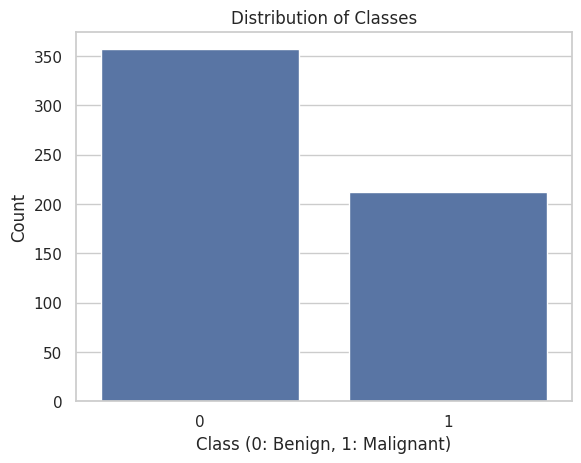

In [38]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()


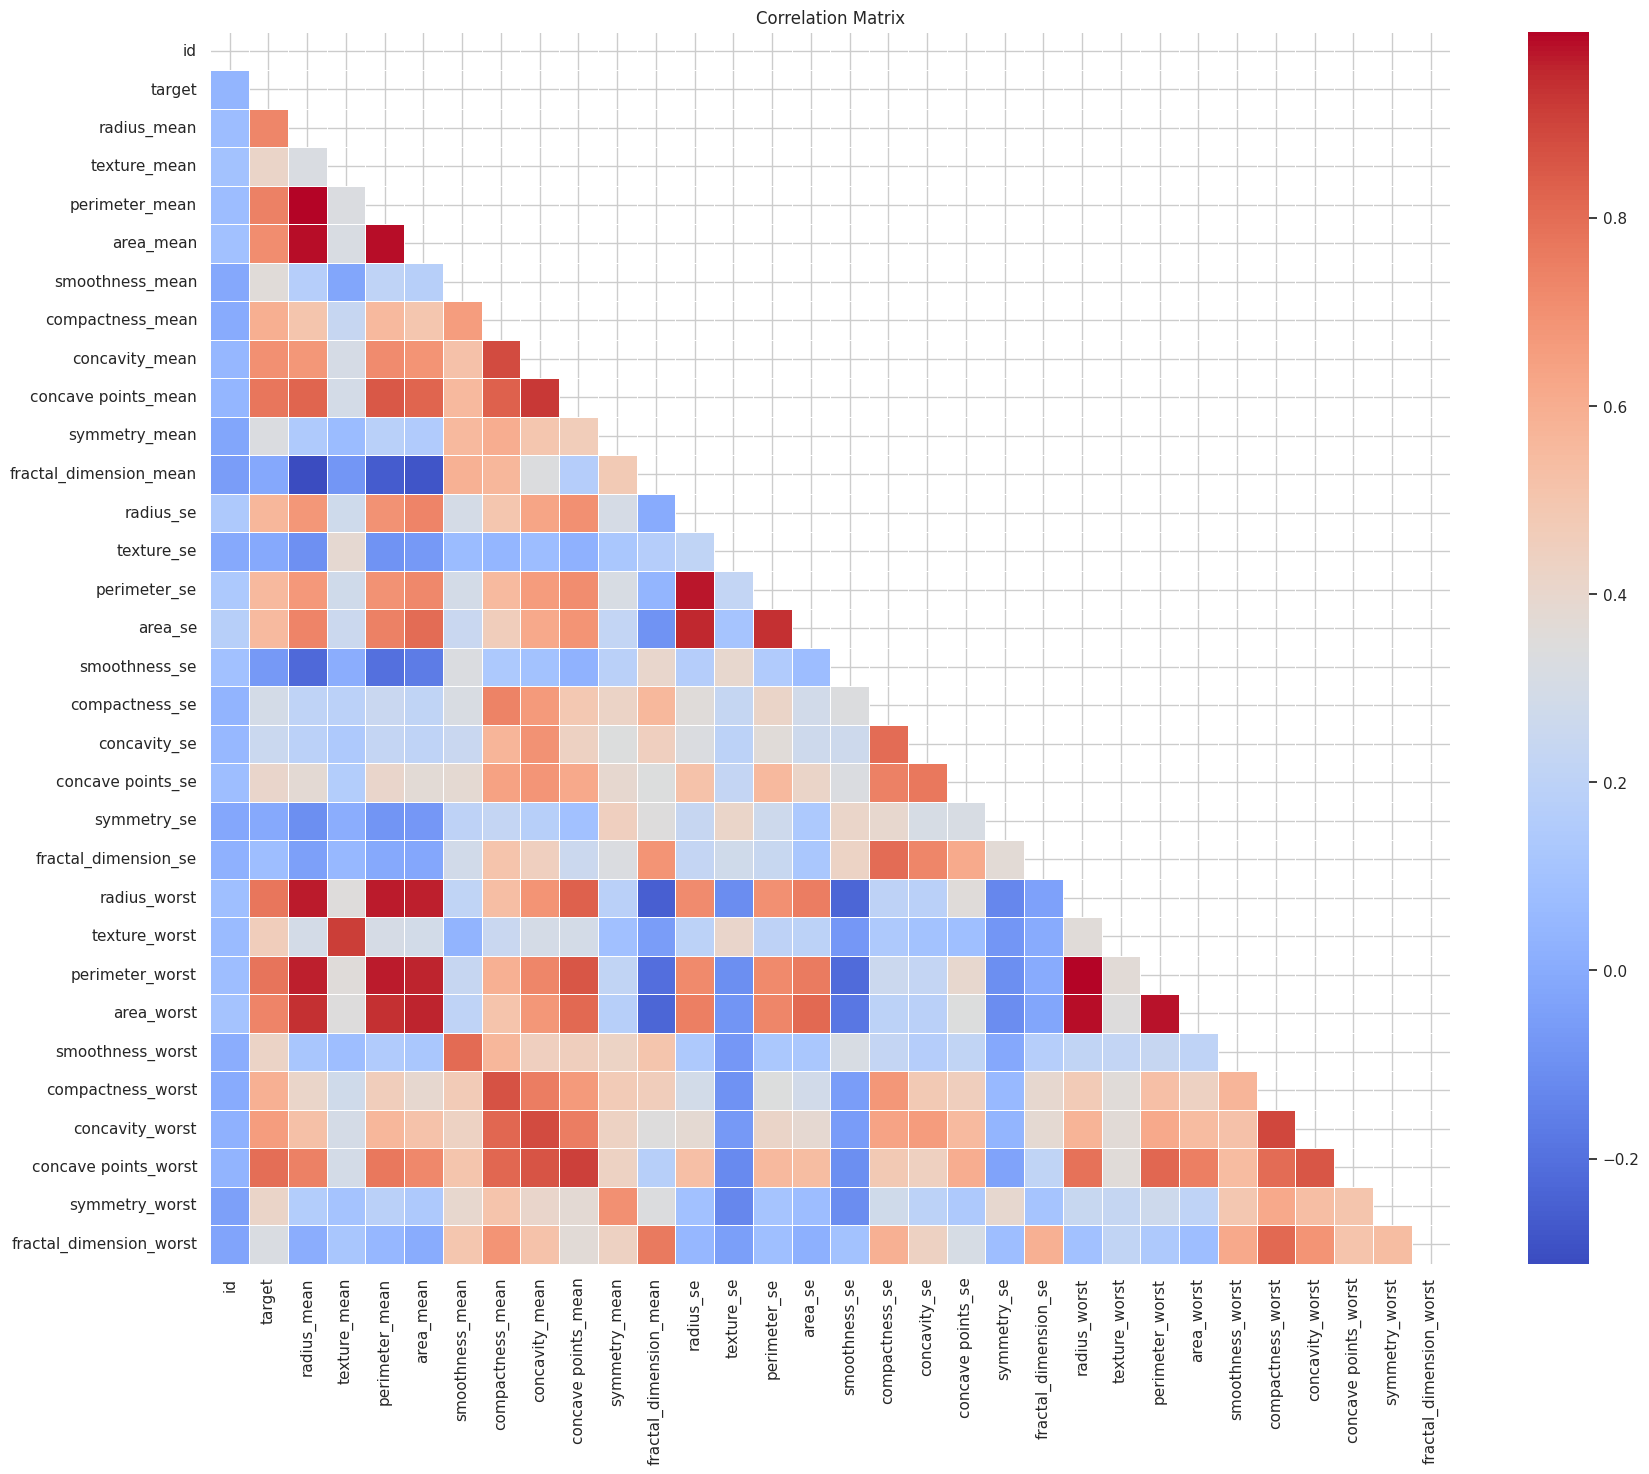

In [39]:
# Compute the correlation matrix
plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [40]:
# Identify highly correlated features
high_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
print(high_corr)


                          id  target  radius_mean  texture_mean  \
id                       1.0     NaN          NaN           NaN   
target                   NaN     1.0          NaN           NaN   
radius_mean              NaN     NaN     1.000000           NaN   
texture_mean             NaN     NaN          NaN      1.000000   
perimeter_mean           NaN     NaN     0.997855           NaN   
area_mean                NaN     NaN     0.987357           NaN   
smoothness_mean          NaN     NaN          NaN           NaN   
compactness_mean         NaN     NaN          NaN           NaN   
concavity_mean           NaN     NaN          NaN           NaN   
concave points_mean      NaN     NaN     0.822529           NaN   
symmetry_mean            NaN     NaN          NaN           NaN   
fractal_dimension_mean   NaN     NaN          NaN           NaN   
radius_se                NaN     NaN          NaN           NaN   
texture_se               NaN     NaN          NaN           Na

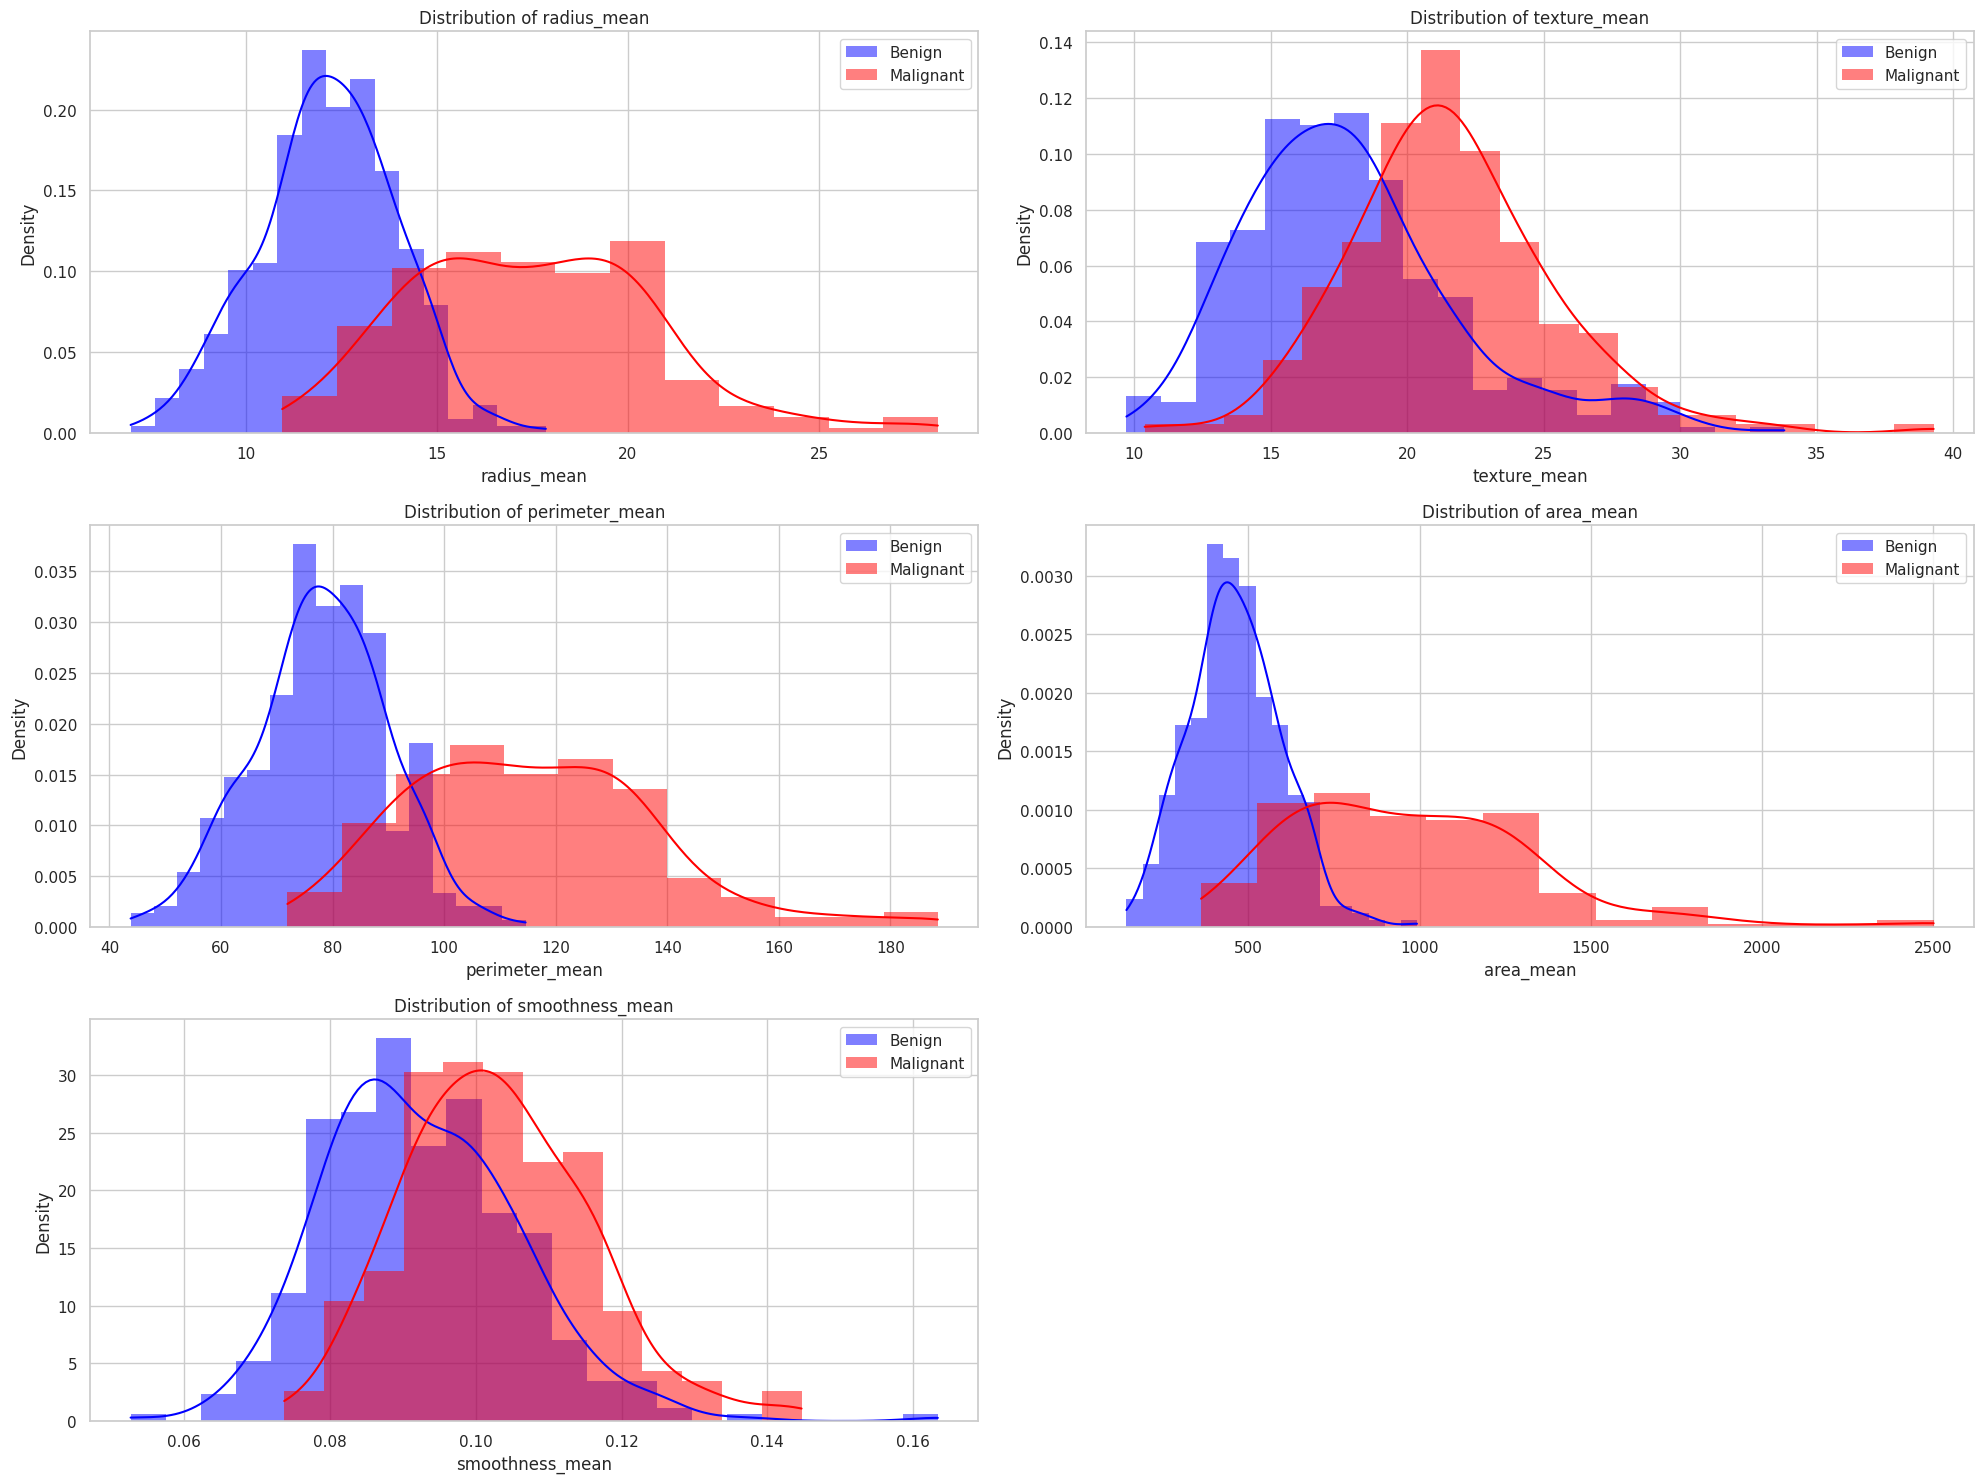

In [41]:
# Plot histograms for a subset of features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[data['target'] == 0][feature], color='blue', label='Benign', kde=True, stat="density", linewidth=0)
    sns.histplot(data[data['target'] == 1][feature], color='red', label='Malignant', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-42-98d471b0fe80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set3')
<ipython-input-42-98d471b0fe80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set3')
<ipython-input-42-98d471b0fe80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set3')
<ipython-input-42-98d471b0fe80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

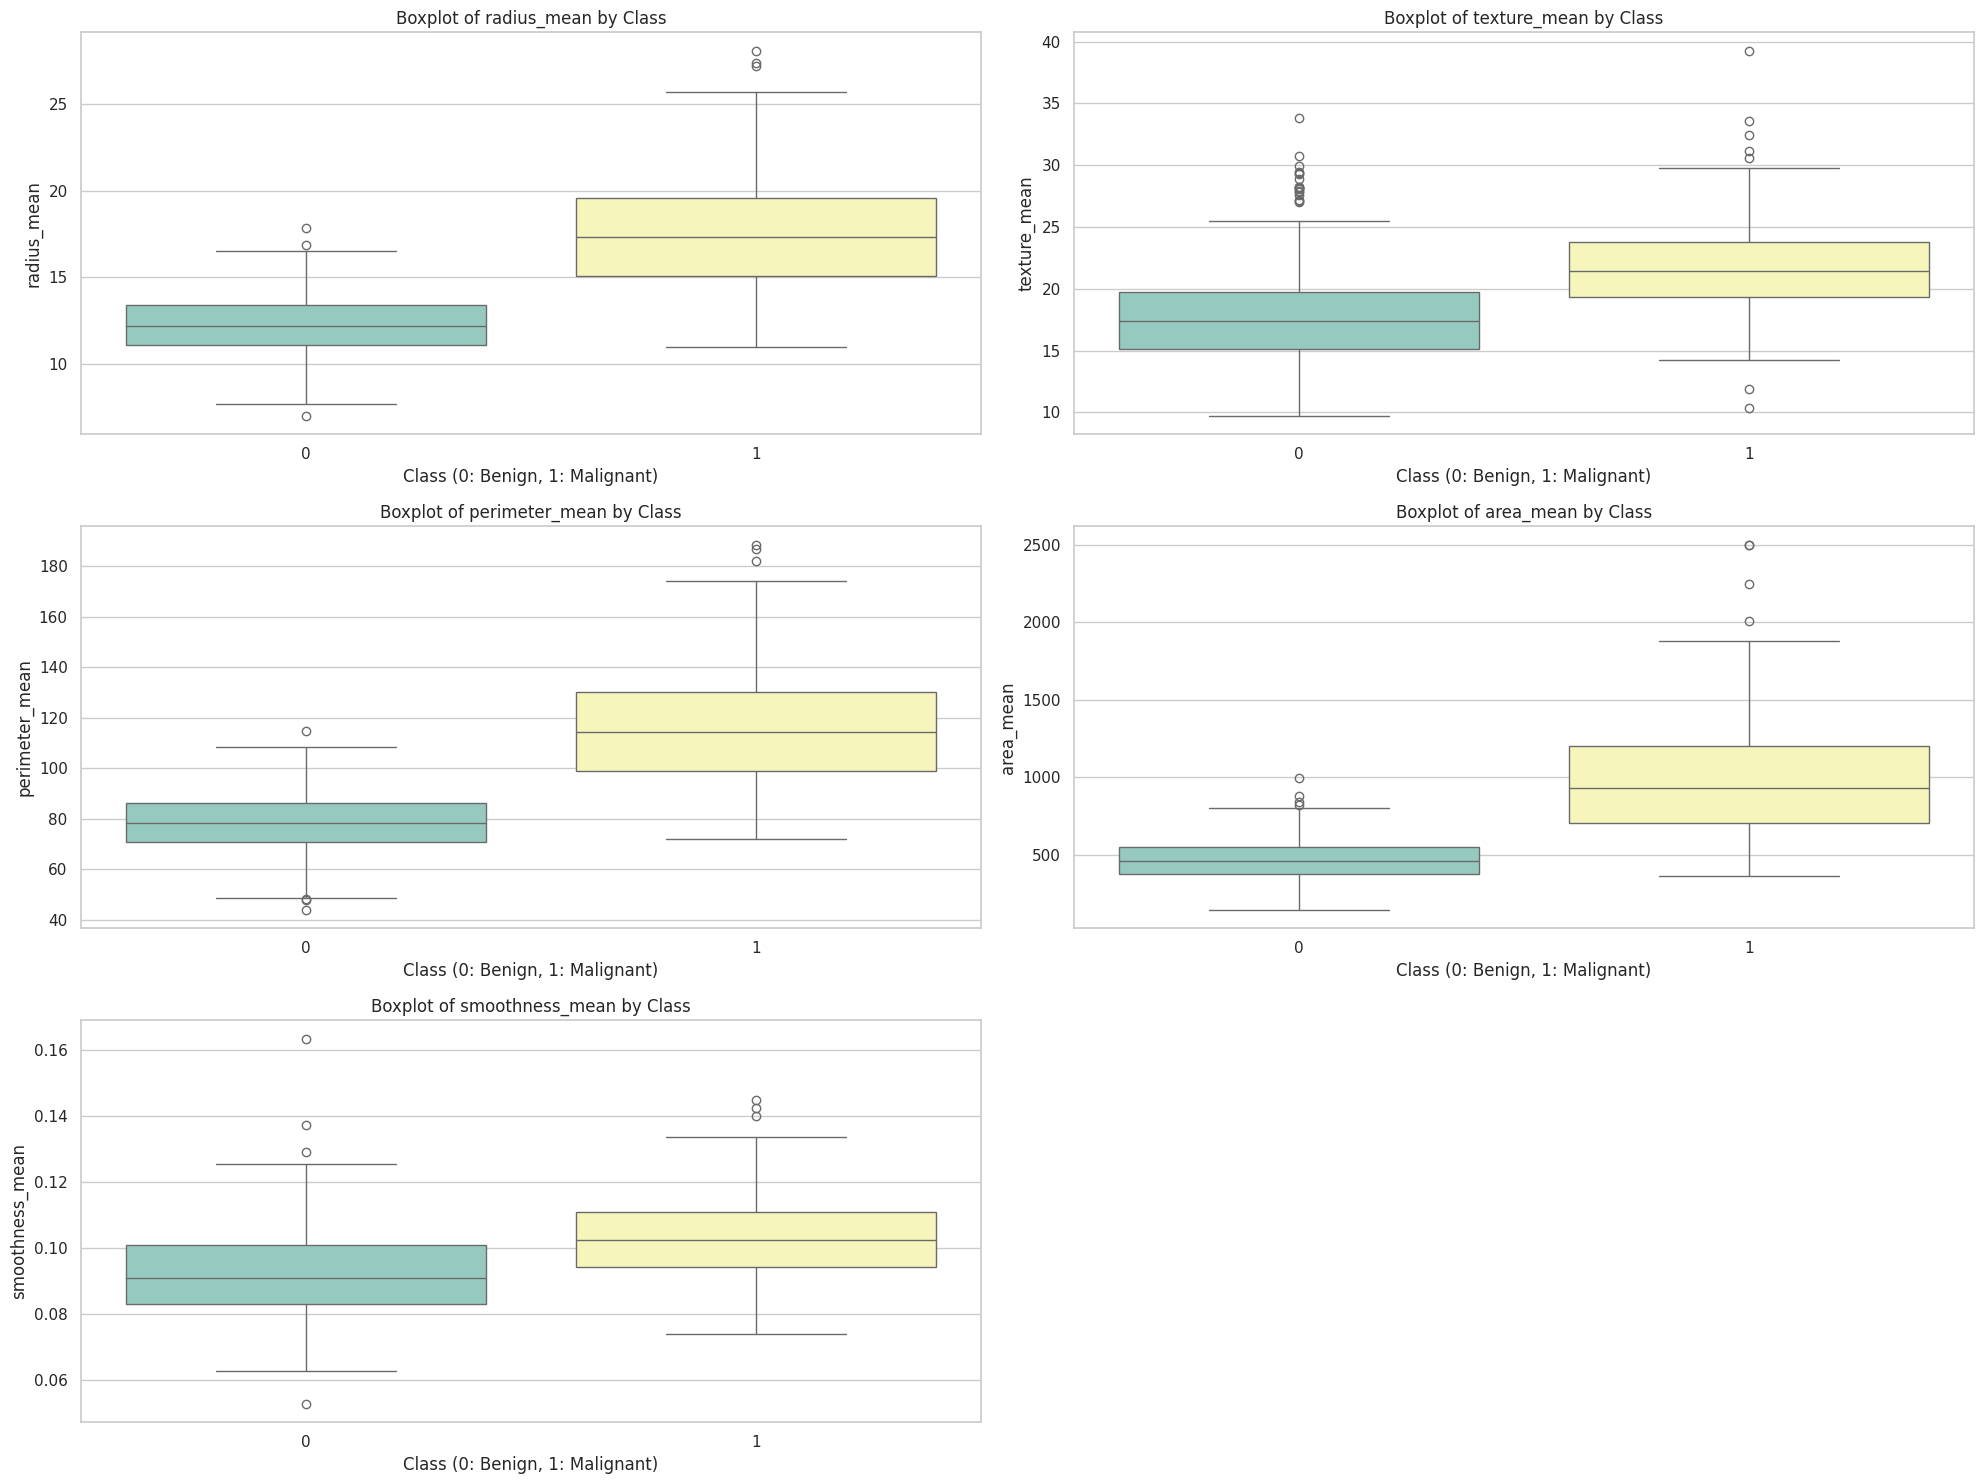

In [42]:
# Boxplots to compare feature distributions between classes
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=feature, data=data, palette='Set3')
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Class (0: Benign, 1: Malignant)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


##4. Feature Engineering and Outlier Handling

In [43]:
# Example: Capping outliers using the 99th percentile
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']:
    upper_limit = data[feature].quantile(0.99)
    data[feature] = np.where(data[feature] > upper_limit, upper_limit, data[feature])


##5. Data Splitting and Scaling

In [44]:
# Define features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (455, 30)
Testing set size: (114, 30)


In [45]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##6. Building and Training the Baseline ANN Model

Construct a simple ANN model to establish a performance benchmark.

In [46]:
# Initialize the ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the ANN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model's architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

##Training the Baseline Model



In [47]:
# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the ANN
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.4870 - loss: 0.9650 - val_accuracy: 0.4396 - val_loss: 0.6404
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5423 - loss: 0.8025 - val_accuracy: 0.6044 - val_loss: 0.5790
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6179 - loss: 0.7034 - val_accuracy: 0.6703 - val_loss: 0.5415
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6106 - loss: 0.7902 - val_accuracy: 0.7363 - val_loss: 0.5161
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6353 - loss: 0.6629 - val_accuracy: 0.8022 - val_loss: 0.4942
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7107 - loss: 0.5732 - val_accuracy: 0.8681 - val_loss: 0.4736
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7041 - loss: 0.5903 - val_accuracy: 0.8901 - val_loss: 0.4547
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7341 - loss: 0.5975 - val_accuracy: 0.8901 -

##Visualizing Training History

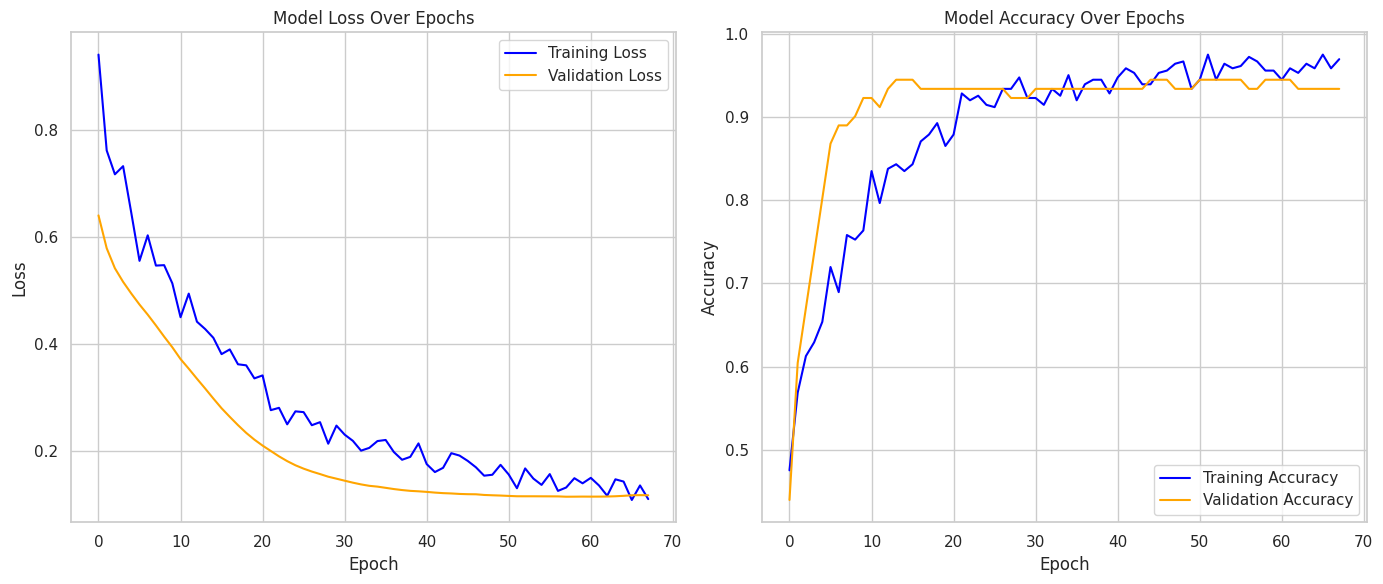

In [48]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##7. Evaluating the Baseline Model

In [49]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [50]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [51]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 97.37%


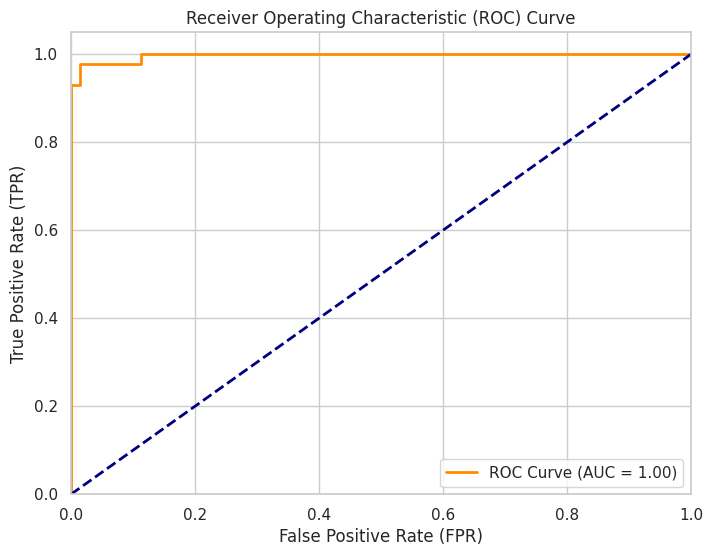

In [53]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


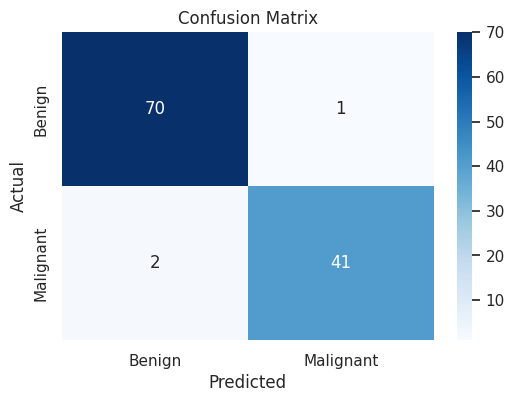

In [63]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


* Accuracy: The majority of predictions are correct (70 Benign correctly classified, 41 Malignant correctly classified).

* Misclassification: There are some misclassifications, with 1 Benign instance incorrectly classified as Malignant, and 2 Malignant instances incorrectly classified as Benign.

* General Performance: This confusion matrix indicates a fairly accurate model, with low misclassification rates for both benign and malignant cases.